In [1]:
from web3 import Web3
import json
import requests
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.renderers.default = "plotly_mimetype+notebook_connected"
import plotly.graph_objects as go
import math

In [2]:
infura_url = "https://mainnet.infura.io/v3/619d68734a8c4565a67d94657faf48a9"
    
web3 = Web3(Web3.HTTPProvider(infura_url))
web3.isConnected()

True

In [120]:
contract_address = web3.toChecksumAddress('0xae7ab96520de3a18e5e111b5eaab095312d7fe84')
abi = json.loads('[{"constant":true,"inputs":[],"name":"proxyType","outputs":[{"name":"proxyTypeId","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"},{"constant":true,"inputs":[],"name":"isDepositable","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"implementation","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"appId","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"kernel","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[{"name":"_kernel","type":"address"},{"name":"_appId","type":"bytes32"},{"name":"_initializePayload","type":"bytes"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"payable":true,"stateMutability":"payable","type":"fallback"},{"anonymous":false,"inputs":[{"indexed":false,"name":"sender","type":"address"},{"indexed":false,"name":"value","type":"uint256"}],"name":"ProxyDeposit","type":"event"}]')

In [3]:
df1 = pd.read_csv('import_file_1.csv', index_col=False, low_memory=False)
df2 = pd.read_csv('import_file_2.csv', index_col=False, low_memory=False)

frames = [df1, df2]
df = pd.concat(frames)

In [4]:
df_pruned = df.drop_duplicates(subset = 'Txhash', keep = 'first')
print(len(df_pruned))

1856


In [6]:
deposit_transactions = df_pruned['TxTo'] == '0x00000000219ab540356cbb839cbe05303d7705fa'
stEth_token_transactions = df_pruned['TxTo'] == '0xae7ab96520de3a18e5e111b5eaab095312d7fe84' 
df_pruned_deposit_transactions = df_pruned[deposit_transactions]
df_pruned_stEth_token_transactions = df_pruned[stEth_token_transactions]
zero_value_transactions = df_pruned_stEth_token_transactions['Value_IN(ETH)'] == 0
df_pruned_zero_value_transactions = df_pruned_stEth_token_transactions[zero_value_transactions]
print(len(df_pruned_deposit_transactions))
print(len(df_pruned_stEth_token_transactions))
print(len(df_pruned_zero_value_transactions))

195
1661
2


In [284]:
df_pruned_deposit_transactions.to_csv('lido_deposits.csv', index = False)
df_pruned_stEth_token_transactions.to_csv('lido_stEth_token_transactions.csv', index = False)

In [249]:
txn_hash_deposit_transactions = df_pruned_deposit_transactions.iloc[:, 0]
data_list_eth2_deposits = []
txn_hash_stEth_token_transactions = df_pruned_stEth_token_transactions.iloc[:, 0]
data_list_stEth_token_transactions = []

In [250]:
for i in txn_hash_deposit_transactions:
    #print(i)
    data_list_eth2_deposits.append(web3.eth.get_transaction(i))

In [251]:
for i in txn_hash_stEth_token_transactions:
    #print(i)
    data_list_stEth_token_transactions.append(web3.eth.get_transaction(i))

In [285]:
df_gas_deposits = pd.DataFrame(data_list_eth2_deposits)

df_gas_stEth_toekn_transactions = pd.DataFrame(data_list_stEth_token_transactions)


# print(df_deposit_transactions)
# print(df_stEth_token_transactions)

In [286]:
df_gas_deposits.to_csv('lido_deposits_with_gas.csv', index = False)
df_gas_stEth_toekn_transactions.to_csv('lido_stEth_token_transactions_with_gas.csv', index = False)

In [7]:
df_deposit_transactions_pairs = df_pruned_deposit_transactions.groupby(['ParentTxFrom','ParentTxTo', 'TxTo', 'From']).size().reset_index().rename(columns={0:'count'})
df_deposit_transactions_pairs.sort_values(["count"], ascending=False)

,ParentTxFrom,ParentTxTo,TxTo,From,count
2,0x6352f8c749954c9df198cf72976e48994a77cce2,0x1ee5c83c4b43aaed21613d5cc7835d36078ce03f,0x00000000219ab540356cbb839cbe05303d7705fa,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,72
5,0xa76a7d0d06754e4fc4941519d1f9d56fd9f8d53b,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,0x00000000219ab540356cbb839cbe05303d7705fa,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,53
0,0x00444797ba158a7bdb8302e72da98dcbccef0fbc,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,0x00000000219ab540356cbb839cbe05303d7705fa,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,36
1,0x073adf97f6de257d76e67f7c2fe57ac9843cca25,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,0x00000000219ab540356cbb839cbe05303d7705fa,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,25
6,0xc8381ca290c198f5ab739a1841ce8aedb0b330d5,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,0x00000000219ab540356cbb839cbe05303d7705fa,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,5
3,0x6e34e47df7026e0ace9457f930f1cfada6f547c4,0x1ee5c83c4b43aaed21613d5cc7835d36078ce03f,0x00000000219ab540356cbb839cbe05303d7705fa,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,3
4,0x99b2c5d50086b02f83e791633c5660fbb8344653,0x1ee5c83c4b43aaed21613d5cc7835d36078ce03f,0x00000000219ab540356cbb839cbe05303d7705fa,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,1


In [12]:
df_lido_deposits_with_gas = pd.read_csv("lido_deposits_with_gas.csv") 
df_lido_deposits_with_gas

,blockHash,blockNumber,from,gas,gasPrice,hash,input,nonce,r,s,to,transactionIndex,type,v,value
0,b'\xb9!6\x92\x0e.L\x1c\xc3\xbc\x06\xccL\x9e\xd...,12514976,0xA76a7D0d06754e4fC4941519D1F9d56fD9f8d53B,10000000,26000000000,"b""\xf7`\xb5;Z?\xafM\x82m;'\xb2\xefZ\x8e\x9fuL\...",0x90adc83b000000000000000000000000000000000000...,2,b'\x8f\x87\x93\x03\x0b\xa9\xa9\x90\x8d+\xb1R\x...,b'\\\xda\xb7(*Z\xb1\xbd\xff\xacl\xf6\xd0X`\x04...,0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84,35,0x0,37,0
1,b'Y\x19\xeb\xa3$\xe1\xa5\xd9\xed\xca\x04W\xb2p...,12515306,0xA76a7D0d06754e4fC4941519D1F9d56fD9f8d53B,10000000,28600001604,b'7\x14\x17.\xc2\xf0\xb9\xc3q\xe2\x08\xa9T\x8c...,0x90adc83b000000000000000000000000000000000000...,3,b'\xce\xaf\x83/\x81\xc9\x86\xa1\x830\x14 \x19D...,b'Y\xc2\x0e\x17D0cqB\xc7\xe1\x14\xa71\xb3\xa9/...,0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84,11,0x0,38,0
2,b'\x15X\xc6T456\xe3+I\xfa\x9e\x0eo\xa5SABZ\xf3...,12516727,0xA76a7D0d06754e4fC4941519D1F9d56fD9f8d53B,10000000,35970000000,b'c\x87\x80\xfc\x97\x9c\xab\xd8\xd3\xabM\xc1\x...,0x90adc83b000000000000000000000000000000000000...,4,b'\xd1\x9b\xc7{`S\xc5\xbaF[\xbdw\xd0D\xae\xaaI...,b'r\x1e\x90\xe5P2\x86.\x8dg2\xc7a\xcc\xf4\x93\...,0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84,31,0x0,38,0
3,b'`X\xfd\x02\x08@\x14i4\xaea\xb4/:I\xe3rL%\xad...,12517352,0xA76a7D0d06754e4fC4941519D1F9d56fD9f8d53B,10000000,33033000000,b'\xd1\xd2\x1b\x94\x15c\xac\xf0\x06(h\xe7\xf8\...,0x90adc83b000000000000000000000000000000000000...,5,b'\xba\xa6\xc1=9\xcc\x16\xc3\xd6}\xf2\xb11K\xe...,b'Gr\xca\xd8Du8\x1b\x1a\x97<\xd6\xa9\x08\x90r1...,0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84,30,0x0,38,0
4,b'\xd42\xa4\x87E\x8c\xbe!\x15r\xe1\x1f\x1b\x16...,12517524,0xA76a7D0d06754e4fC4941519D1F9d56fD9f8d53B,10000000,33000000000,"b""\xab\xc0\xad\xff%\x98\xf1'\x9cN'\xe6RB\xad\x...",0x90adc83b000000000000000000000000000000000000...,6,b'KXA\x93\xb8\x9a\xde`~@\x8b\x19j$t%\xe1\xaf\x...,"b'2&\x97\x17\xf2vC\xab\x96;\xbf\xb7,Bl#\x9c\xb...",0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84,54,0x0,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,b'\xb1\xa1\xd8\xf1`\xf8\xb5\xc0Vv\x90.?\x86\x0...,12493144,0x00444797Ba158A7BdB8302e72da98dCbCCef0Fbc,12880275,54000000000,b'&\x1dj_<\xd5\xe4\xf2M\x95Z\xa434a\x95\x06y\x...,0x90adc83b000000000000000000000000000000000000...,210,b'q`\xbapsi\xf7\xb0B6i\x92\x14\xd2\xdd\x96\xb1...,b'h\xa9\x82\x1d!\xed\xff\x83\xa1\x00\x828LU\xe...,0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84,29,0x0,37,0
191,"b""F\xb3G\xf9'\xcb\x15s\xf1\x80\xd3\x1a\n\x9b\x...",12493180,0x00444797Ba158A7BdB8302e72da98dCbCCef0Fbc,12880275,46000000000,b'\x0c\xf9\xd4\r\x90\x87lu\xdc^\xfe\x19\x0c\x8...,0x90adc83b000000000000000000000000000000000000...,211,b'\xb1\xf5\xd7\xac-\xf2\x17\xd9\xc7\xa2\xeaZ\x...,b'l\x8e\x19\xb8\x86\xd9\xd0\x08D\xa6v\x9a\x9f\...,0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84,18,0x0,38,0
192,b'\xb8A\xb1m\x10S\xa9\xd7\xed\xaa?\x81\x99\xe0...,12493515,0x00444797Ba158A7BdB8302e72da98dCbCCef0Fbc,12880275,46000000000,"b'\r\xd7,0\xa1\xfbSh[\xbf}\xfcE\xa9\xab\xd0\xa...",0x90adc83b000000000000000000000000000000000000...,212,"b""\x8e'\xb3d\xb7$\xb3\\Y\xb0v\x06\n\xe8O \xac\...","b'?\xc4\x14\xb6\t\x944G\xbd\xca""F\xbe\xc8\xa2n...",0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84,11,0x0,38,0
193,b'\xa6P+_-{O\x9e\xa8\xd8o\xb6\x17\x8e(\xcb*^\x...,12494668,0x00444797Ba158A7BdB8302e72da98dCbCCef0Fbc,12956874,37000000000,b'y\xafP\x87c\x88|\xa3\xf7\xe3\x08\xe80\xfey\x...,0x90adc83b000000000000000000000000000000000000...,213,b'%N\xbf\xefRj\x16j`\x8e*\xa11!@\xf8\xaa\xf9\x...,"b'a\xa6\xfea\xf41J*A\xfe\x08""\xf0\x15\x89\xd9\...",0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84,18,0x0,37,0


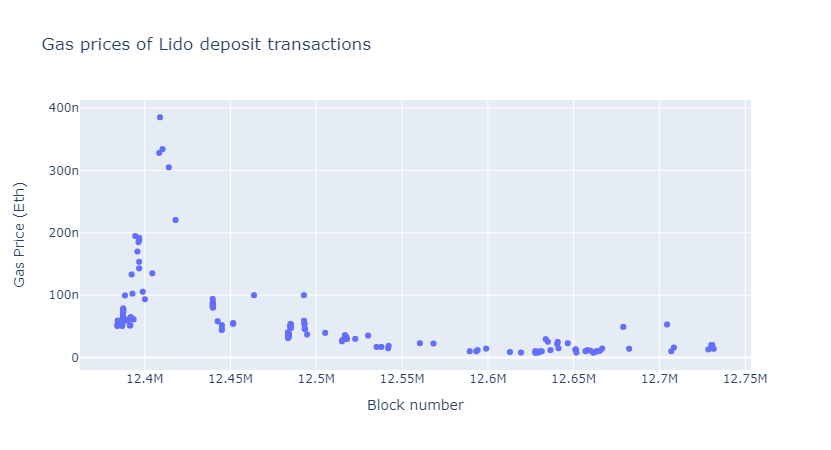

In [36]:
# x = df_lido_deposits_with_gas["blockNumber"]
y = df_lido_deposits_with_gas["gasPrice"]
lst = []
for i in y:
    #lst.append(int(i)/(10**8))
    lst.append(Web3.fromWei(int(i), 'ether'))
fig = px.scatter(x = df_lido_deposits_with_gas["blockNumber"] ,y = lst, title = "Gas prices of Lido deposit transactions")
fig.update_layout(xaxis_title = "Block number", yaxis_title = "Gas Price (Eth)")
fig.show()